### Plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
temps = [50, 60, 90, 95, 60]
temp3 = pd.Series(temps, name='Temp3', index=['T', 'W', 'Th', 'S', 'M'])
temp3

T     50
W     60
Th    90
S     95
M     60
Name: Temp3, dtype: int64

In [4]:
%matplotlib inline

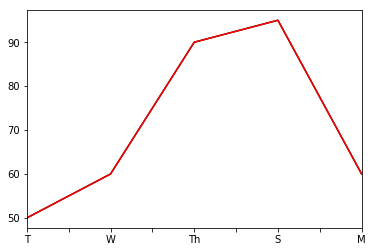

In [8]:
temp3.plot(style='k')
temp3.plot(style='r')

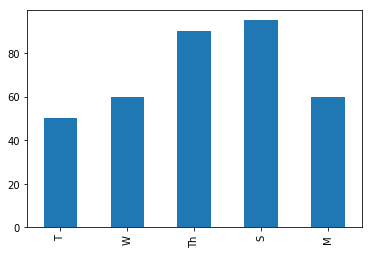

In [11]:
temp3.plot.bar()

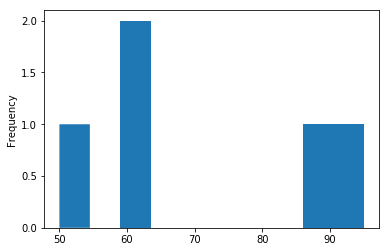

In [13]:
temp3.plot.hist()

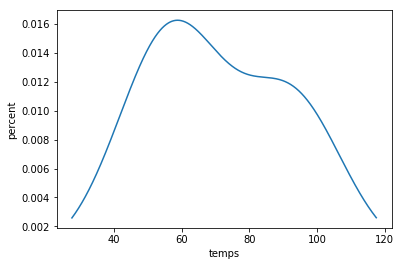

In [19]:
ax = temp3.plot.kde()
ax.set_xlabel('temps')
ax.set_ylabel('percent')

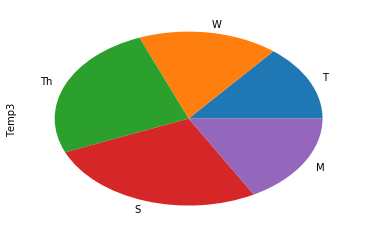

In [18]:
temp3.plot.pie()

### Read and write to CSV

In [28]:
temp3.name = 'Temps'
temp3.to_csv('temp3.csv', header=True, index_label='index')

In [29]:
!type temp3.csv

index,Temps
T,50
W,60
Th,90
S,95
M,60


In [35]:
temp4 = pd.Series.from_csv('temp3.csv', header=0)
temp4

index
T     50
W     60
Th    90
S     95
M     60
Name: Temps, dtype: int64

In [36]:
temp4.values

array([50, 60, 90, 95, 60], dtype=int64)

In [38]:
df = pd.read_csv('temp3.csv', index_col=0)
df

,Temps
index,
T,50
W,60
Th,90
S,95
M,60


In [39]:
type(df)

pandas.core.frame.DataFrame

In [41]:
df['Temps']

index
T     50
W     60
Th    90
S     95
M     60
Name: Temps, dtype: int64

### Data  Frames

In [42]:
cols = {
    'name': ['Paul', 'George', 'Ringo'],
    'age': [22, 21, 23]
}
df = pd.DataFrame(cols)

In [43]:
df

,age,name
0,22,Paul
1,21,George
2,23,Ringo


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
age     3 non-null int64
name    3 non-null object
dtypes: int64(1), object(1)
memory usage: 72.0+ bytes


In [45]:
df.age

0    22
1    21
2    23
Name: age, dtype: int64

0      Paul
1    George
2     Ringo
Name: name, dtype: object

In [47]:
df['age']

0    22
1    21
2    23
Name: age, dtype: int64

In [48]:
df.describe()
## Summary statistics for each numeric column

,age
count,3.0
mean,22.0
std,1.0
min,21.0
25%,21.5
50%,22.0
75%,22.5
max,23.0


In [49]:
df.columns

Index([u'age', u'name'], dtype='object')

### Similarities to Python Dictionaries

In [50]:
df['last'] = pd.Series(['Lennon', 'McCartney', 'Starkey'], index=[4,0,2])
df

,age,name,last
0,22,Paul,McCartney
1,21,George,NaN
2,23,Ringo,Starkey


In [51]:
df['instrument'] = ['Bass', 'Guitar', 'Drums']
df

,age,name,last,instrument
0,22,Paul,McCartney,Bass
1,21,George,NaN,Guitar
2,23,Ringo,Starkey,Drums


In [52]:
## Broadcasting
df['birthplace'] = 'Liverpool'
df

,age,name,last,instrument,birthplace
0,22,Paul,McCartney,Bass,Liverpool
1,21,George,NaN,Guitar,Liverpool
2,23,Ringo,Starkey,Drums,Liverpool


In [54]:
# by Column access
df.age
df['age'] ## Column name has spaces orbad characters etc

0    22
1    21
2    23
Name: age, dtype: int64

In [55]:
df[['name', 'last']]

,name,last
0,Paul,McCartney
1,George,NaN
2,Ringo,Starkey


In [56]:
del df['last']
df

,age,name,instrument,birthplace
0,22,Paul,Bass,Liverpool
1,21,George,Guitar,Liverpool
2,23,Ringo,Drums,Liverpool


In [57]:
df.pop('birthplace')

0    Liverpool
1    Liverpool
2    Liverpool
Name: birthplace, dtype: object

In [58]:
df

,age,name,instrument
0,22,Paul,Bass
1,21,George,Guitar
2,23,Ringo,Drums


### Creation from Lists and Dicts

In [60]:
cols = {
    'name': ['Paul', 'George', 'Ringo'],
    'age': [22, 21, 23]
}
df = pd.DataFrame(cols, columns=['name', 'age']) ## Specify columns to enforce order
df

,name,age
0,Paul,22
1,George,21
2,Ringo,23


In [62]:
rows = [
    {'name' : 'Paul', 'age': 22},
    {'name' : 'George', 'age': 21},
    {'name' : 'Ringo', 'age': 22}
       ]
df = pd.DataFrame(rows)
df

,age,name
0,22,Paul
1,21,George
2,22,Ringo


In [63]:
import json

In [66]:
col_json = json.dumps(cols)
print(col_json)
df = pd.read_json(col_json)
df

{"age": [22, 21, 23], "name": ["Paul", "George", "Ringo"]}


,age,name
0,22,Paul
1,21,George
2,23,Ringo


In [69]:
row_json = json.dumps(rows)
print(row_json)
df = pd.read_json(row_json)
df

[{"age": 22, "name": "Paul"}, {"age": 21, "name": "George"}, {"age": 22, "name": "Ringo"}]


,age,name
0,22,Paul
1,21,George
2,22,Ringo


In [72]:
df.iloc[0]

age       22
name    Paul
Name: 0, dtype: object

In [73]:
df.loc[2]

age        22
name    Ringo
Name: 2, dtype: object

In [74]:
df.iloc[0:2]

,age,name
0,22,Paul
1,21,George


### Selection

In [75]:
df = pd.DataFrame({'Name' : ['Paul', 'George', 'Ringo'], 'growth' : [0.5, 0.7, 1.2]})
df

,Name,growth
0,Paul,0.5
1,George,0.7
2,Ringo,1.2


In [77]:
df[df.Name == 'Paul']

,Name,growth
0,Paul,0.5


In [78]:
df[df.Name.str.contains('o')]

,Name,growth
1,George,0.7
2,Ringo,1.2


In [79]:
df.dtypes

Name       object
growth    float64
dtype: object

In [86]:
df[(df.Name == 'Paul') & (df.growth > 0.4)] ### Use & instead of Python and

,Name,growth
0,Paul,0.5


In [87]:
df.query("Name == 'Paul' and growth > 0.4")

,Name,growth
0,Paul,0.5


In [89]:
df[(df['Name'] == 'Paul') | (df['Name'] == 'George')]

,Name,growth
0,Paul,0.5
1,George,0.7


In [90]:
df.query('Name == "Paul" or Name == "George"')

,Name,growth
0,Paul,0.5
1,George,0.7


In [91]:
# not
df[~(df.Name == 'Paul')]

,Name,growth
1,George,0.7
2,Ringo,1.2


In [92]:
df.query('not Name == "John"')

,Name,growth
0,Paul,0.5
1,George,0.7
2,Ringo,1.2


In [93]:
df[df.Name != 'John']

,Name,growth
0,Paul,0.5
1,George,0.7
2,Ringo,1.2


In [94]:
df.head(2)

,Name,growth
0,Paul,0.5
1,George,0.7


In [95]:
df.tail(2)

,Name,growth
1,George,0.7
2,Ringo,1.2


In [96]:
df.iloc[[2,1]]

,Name,growth
2,Ringo,1.2
1,George,0.7


In [98]:
df[1:]

,Name,growth
1,George,0.7
2,Ringo,1.2


In [100]:
df[1:2]

,Name,growth
1,George,0.7
